In [1]:
#Data Description
#Age | Objective Feature | age | int (days)
#Height | Objective Feature | height | int (cm) |
#Weight | Objective Feature | weight | float (kg) |
#Gender | Objective Feature | gender | categorical code | 1:woman 2: man
#Systolic blood pressure | Examination Feature | ap_hi | int |
#Diastolic blood pressure | Examination Feature | ap_lo | int |
#Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#Smoking | Subjective Feature | smoke | binary |
#Alcohol intake | Subjective Feature | alco | binary |
#11.Physical activity | Subjective Feature | active | binary |
#12. Presence or absence of cardiovascular disease | Target Variable | cardio | 1: disease 0: no|


import pandas as pd

df = pd.read_csv('C:/Users/chgbessa/Documents/python/machine_learning/My_projects_QML/cardio_train.csv', 
                 delimiter = ';', nrows = None)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
#Lets transform age in years unstead of days

df['age'] = df['age'].apply(lambda x: x/365)

df['age'] = df['age'].astype(int)

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Listing 9.1: The chances of survival
def chance_healthy(age):
    pop = df[df.age.eq(age)]
    healthy = pop[pop.cardio.eq(0)]
    prob = len(healthy)/(len(pop)+1)
    return "A {}-year old passenger had a chance to survive of {}".format(age, prob)

In [5]:
print(chance_healthy(55))
print(chance_healthy(48))

A 55-year old passenger had a chance to survive of 0.44679226069246436
A 48-year old passenger had a chance to survive of 0.5435982339955849


In [6]:
# Listing 9.2: Health of a young
# max age of a child
max_young_age = 40

# probability to be healthy of a young
pop_young = df[df.age.le(max_young_age)]
healthy_young = pop_young[pop_young.cardio.eq(0)]
p_young = len(healthy_young)/len(pop_young)

# probability to survive of olds
pop_old = df[df.age.gt(max_young_age)]
healthy_old = pop_old[pop_old.cardio.eq(0)]
p_old = len(healthy_old)/len(pop_old)

print("{} young had a chance to be healthy of {}".format(len(pop_young), round(p_young, 2)))
print("{} old had a chance to be healthy of {}".format(len(pop_old), round(p_old, 2)))

3406 young had a chance to be healthy of 0.77
66594 old had a chance to be healthy of 0.49



--------------------------------------------

#Section 9.2: Composing Quantum ComputingControls

------------------------------------------------

In [7]:


#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
#from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
#from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt



#import numpy as np
#import matplotlib.pyplot as plt
#from qiskit.aqua.components.uncertainty_models import NormalDistribution, UniformDistribution, LogNormalDistributio
#from qiskit_finance.circuit.library.probability_distributions import NormalDistribution, UniformDistribution,LogNormalDistribution
#from math import sqrt
from math import asin, sqrt

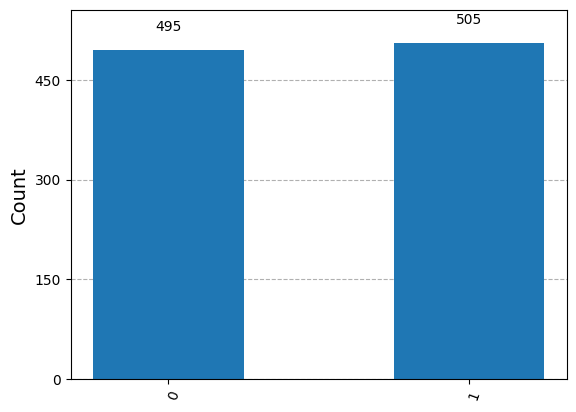

In [8]:
# Listing 9.3: Specify the marginal probability


def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))
    
qc = QuantumCircuit(1)

# Set qubit to prior
qc.ry(prob_to_angle(0.5), 0)   #Prior = 0.5

qc.measure_all()

#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)



# execute the qc
#results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.meas.get_counts()

#plot_histogram(results)
plot_histogram(counts)

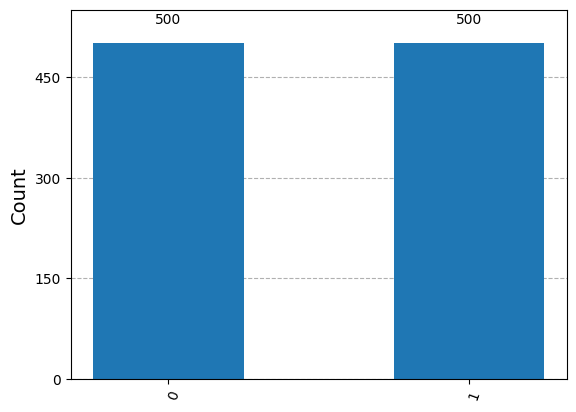

In [9]:
# Listing 9.4: Use the X‐gate to work with the remainder
qc = QuantumCircuit(1)

# Set qubit to prior
qc.ry(prob_to_angle(0.5), 0)

# Switch the qubit's value
qc.x(0)

qc.measure_all()

# execute the qc
#results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()

job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.meas.get_counts()

plot_histogram(counts)

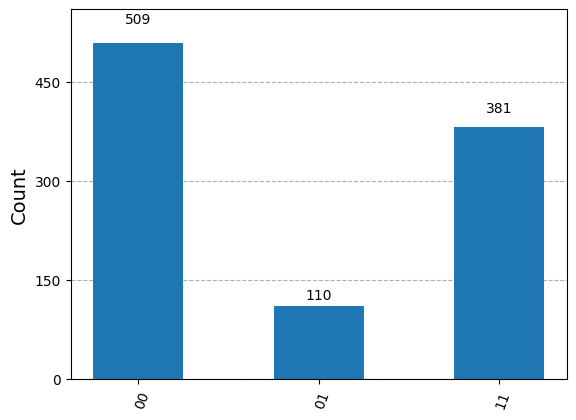

In [10]:
# Listing 9.5: Calculate the joint probability
qc = QuantumCircuit(2)

# Set qubit to prior
qc.ry(prob_to_angle(0.5), 0)

# Switch the qubit's value
qc.x(0)

# Calculate the joint probability of NOT-prior and an event
qc.cry(prob_to_angle(0.77), 0,1)  #prob =young = 0.77

qc.measure_all()

# execute the qc
#results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
#plot_histogram(results)


job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.meas.get_counts()

plot_histogram(counts)

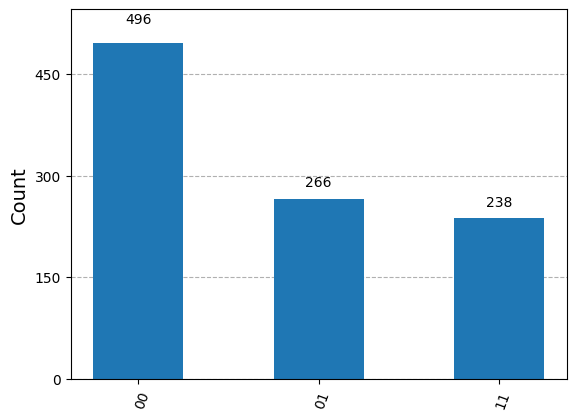

In [11]:
# Listing 9.5: Calculate the joint probability
qc = QuantumCircuit(2)

# Set qubit to prior
qc.ry(prob_to_angle(0.5), 0)

# Switch the qubit's value
qc.x(0)

# Calculate the joint probability of NOT-prior and an event
qc.cry(prob_to_angle(0.49), 0,1)  #prob =old = 0.49

qc.measure_all()

# execute the qc
#results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
#plot_histogram(results)

job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.meas.get_counts()

plot_histogram(counts)

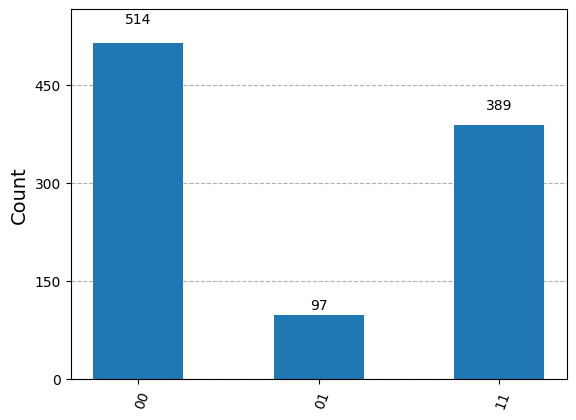

In [12]:
# Listing 9.6: Decomposition of the CRY‐gate
qc = QuantumCircuit(2)

# Set qubit to prior
qc.ry(prob_to_angle(0.5), 0)

# Switch the qubit's value
qc.x(0)

# Apply half of the event's probability
qc.ry(prob_to_angle(0.77)/2, 1)

# entangle qubits 0 and 1
qc.cx(0,1)

# Apply the other half of ev_b
qc.ry(-prob_to_angle(0.77)/2, 1)

# unentganle qubits 0 and 1
qc.cx(0,1)

qc.measure_all()

# execute the qc
#results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
#plot_histogram(results)


job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.meas.get_counts()

plot_histogram(counts)

In [13]:
# Listing 9.7: The CCNOT‐function
from math import pi
theta = pi/2

def ccnot(qc):
    # Apply the first half of the rotatione
    qc.cry(theta, 1,2)

    # This sequence has no effect if both control qubits
    # are in state |1>
    qc.cx(0,1)
    qc.cry(-theta,1,2)
    qc.cx(0,1)

    # Apply the second half of the rotation
    qc.cry(theta, 0,2)

    qc.measure_all()

    job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

    result = job_aer.result()
    counts = result[0].data.meas.get_counts()



    # execute the qc
    #return execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
    return(counts)

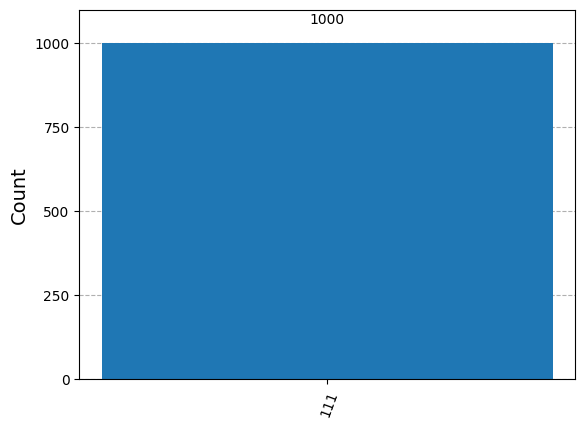

In [14]:
# Listing 9.8: The CCNOT‐gate with both control qubits in state |1>
qc = QuantumCircuit(3)

# set both qubits to |1>
qc.x(0)
qc.x(1)



# apply the ccnot-gate and execute the qc
results = ccnot(qc)
plot_histogram(results)

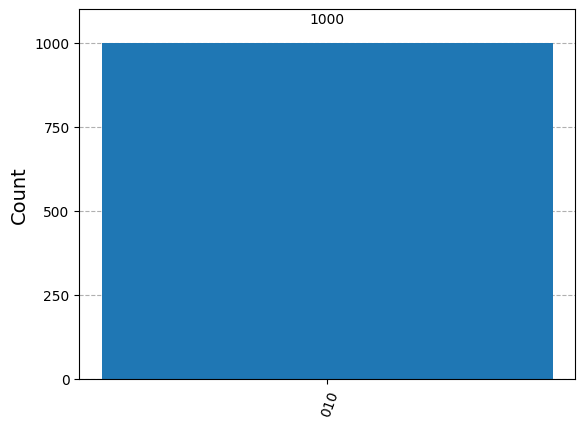

In [15]:
# Listing 9.9: The CCNOT‐gate with only control qubit q1 in state |1>
qc = QuantumCircuit(3)

# set only qubit q_1 to |1>
qc.x(1)

# apply the ccnot-gate and execute the qc
results = ccnot(qc)
plot_histogram(results)

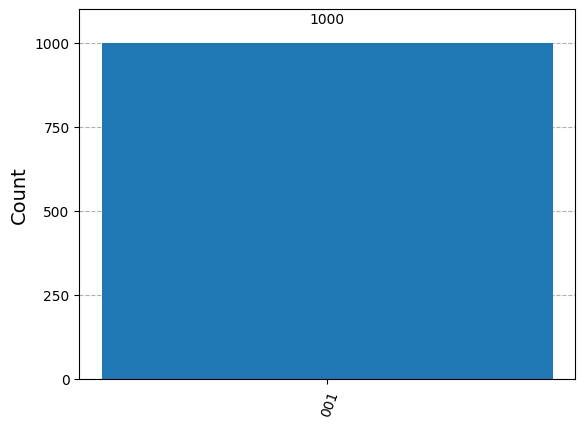

In [16]:
# Listing 9.10: The CCNOT‐gate with only control qubit q0 in state |1>
qc = QuantumCircuit(3)

# set only qubit q_0 to |1>
qc.x(0)

# apply the ccnot-gate and execute the qc
results = ccnot(qc)
plot_histogram(results)

In [17]:
#Section 9.3: Circuit implementation

In [18]:
#Probability to be healthy if the patient has a normal cholesterol

nchol = df[df.cholesterol.eq(1)]

prob_healthy_nchol = len(nchol[nchol.cardio.eq(0)])/len(nchol)

print('P(Healthy|Normal-Cholesterol) is {:.2f}'.format(prob_healthy_nchol)) 

P(Healthy|Normal-Cholesterol) is 0.56


In [19]:
# Initialize the quantum circuit
qc = QuantumCircuit(3)

# Set qubit0 to p_child
qc.ry(prob_to_angle(p_young), 0)

# Set qubit1 to p_female
qc.ry(prob_to_angle(prob_healthy_nchol), 1)

In [20]:
# Listing 9.12: Definition of the CCRY‐gate
def ccry(qc, theta, control1, control2, controlled):
    qc.cry(theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, controlled)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, controlled)

In [21]:
# Listing 9.13: Calculate the conditional probabilities
# normal cholesterol and young

pop_nchol=df[df.cholesterol.eq(1)]

pop_nc_y=pop_nchol[pop_nchol.age.le(max_young_age)]
healthy_nc_y = pop_nc_y[pop_nc_y.cardio.eq(0)]
p_healthy_nc_y=len(healthy_nc_y)/len(pop_nc_y)

# normal cholesterol and old
pop_nc_o = pop_nchol[pop_nchol.age.gt(max_young_age)]
healthy_nc_o=pop_nc_o[pop_nc_o.cardio.eq(0)]
p_healthy_nc_o=len(healthy_nc_o)/len(pop_nc_o)

# bad cholesterol and young
pop_bchol=df[df.cholesterol.eq(2)+ df.cholesterol.eq(2) ] #+ df[df.cholesterol.eq(3)]

pop_bc_y=pop_bchol[pop_bchol.age.le(max_young_age)]
healthy_bc_y=pop_bc_y[pop_bc_y.cardio.eq(0)]
p_healthy_bc_y=len(healthy_bc_y)/len(pop_bc_y)

# bad cholesterol and old adults
pop_bc_o=pop_bchol[pop_bchol.age.gt(max_young_age)]
healthy_bc_o=pop_bc_o[pop_bc_o.cardio.eq(0)]
p_healthy_bc_o=len(healthy_bc_o)/len(pop_bc_o)

In [22]:
# Listing 9.14: Initialize the child node
# set state |00> to conditional probability of bad cholesterol and old
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_healthy_bc_o),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of bad cholesterol and young
qc.x(0)
ccry(qc,prob_to_angle(p_healthy_bc_y),0,1,2)
qc.x(0)

# set state |10> to conditional probability of normal cholesterol and old adults
qc.x(1)
ccry(qc,prob_to_angle(p_healthy_nc_o),0,1,2)
qc.x(1)

# set state |11> to conditional probability of normal cholesterol and young
ccry(qc,prob_to_angle(p_healthy_nc_y),0,1,2)

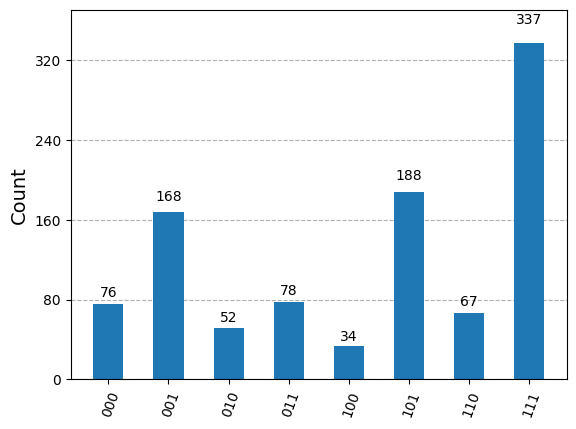

In [23]:
# Listing 9.15: Execute the circuit
# execute the qc


qc.measure_all()

job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.meas.get_counts()

plot_histogram(counts)



#results = execute(qc,Aer.get_backend('statevector_simulator')).result().get_counts()
#plot_histogram(results)

In [24]:
#from qiskit import QuantumRegister, ClassicalRegister


# Listing 9.16: A quantum circuit with classical register
#qr = QuantumRegister(3)
#cr = ClassicalRegister(1)
qc = QuantumCircuit(3, 1)

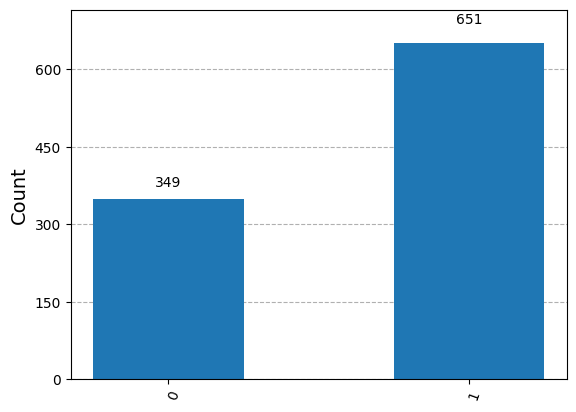

In [25]:
# Listing 9.17: Run the circuit including a measurement

# -- INCLUDE ALL GATES HERE --

# Set qubit0 to p_young
qc.ry(prob_to_angle(p_young), 0)

# Set qubit1 to p_healthy_nchol
qc.ry(prob_to_angle(prob_healthy_nchol), 1)

# set state |00> to conditional probability of bad cholesterol and old
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_healthy_bc_o),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of bad cholesterol and young
qc.x(0)
ccry(qc,prob_to_angle(p_healthy_bc_y),0,1,2)
qc.x(0)

# set state |10> to conditional probability of normal cholesterol and old
qc.x(1)
ccry(qc,prob_to_angle(p_healthy_nc_o),0,1,2)
qc.x(1)

# set state |11> to conditional probability of normal cholesterol and young
ccry(qc,prob_to_angle(p_healthy_nc_y),0,1,2)

qc.measure(2, 0)

job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.c.get_counts()  #since I specified the qubit I want to mesure, his name now is 'c' instead of 'meas'

plot_histogram(counts)
#results = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
#plot_histogram(results)

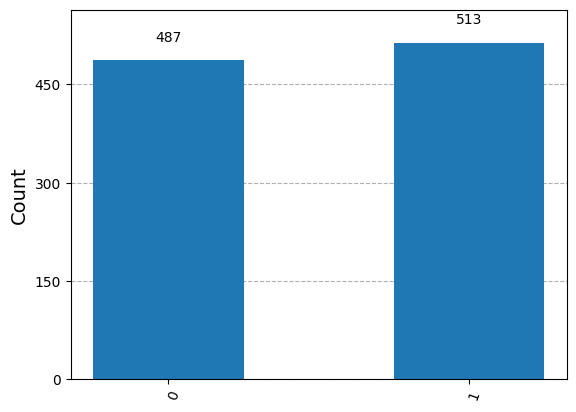

In [26]:
# Set qubit0 to p_young
qc.ry(prob_to_angle(p_young), 0)

# Set qubit1 to p_healthy_nchol
qc.ry(prob_to_angle(prob_healthy_nchol), 1)

# set state |00> to conditional probability of normal cholesterol and young
qc.x(0)
qc.x(1)
ccry(qc,prob_to_angle(p_healthy_nc_y),0,1,2)
qc.x(0)
qc.x(1)

# set state |01> to conditional probability of normal cholesterol and old
qc.x(0)
ccry(qc,prob_to_angle(p_healthy_nc_o),0,1,2)
qc.x(0)

# set state |10> to conditional probability of bad cholesterol and young
qc.x(1)
ccry(qc,prob_to_angle(p_healthy_bc_y),0,1,2)
qc.x(1)

# set state |11> to conditional probability of bad cholesterol and old
ccry(qc,prob_to_angle(p_healthy_bc_o),0,1,2)

qc.measure(2, 0)

job_aer = sampler_aer.run([(qc, None, 1000)]) # running the circuit 1000 times

result = job_aer.result()
counts = result[0].data.c.get_counts()

plot_histogram(counts)


#results = execute(qc,Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
#plot_histogram(results)